## Sharpe Ratio

In [4]:
!pip install numpy
!pip install pandas_datareader
!pip install datetime
!pip install pandas
!pip install matplotlib

In [5]:
import numpy as np
import pandas_datareader as pdr
import datetime as dt
import pandas as pd

In [63]:
tickers = ['AAPL', 'MSFT', 'TWTR', 'IBM']
start = dt.datetime(2020, 1, 1)

data=pdr.get_data_yahoo(tickers,start)

In [64]:
data.head()

Attributes  Adj Close                                         Close  \
Symbols          AAPL        MSFT       TWTR         IBM       AAPL   
Date                                                                  
2019-12-31  72.337990  154.749725  32.049999  115.927086  73.412498   
2020-01-02  73.988472  157.615128  32.299999  117.120598  75.087502   
2020-01-03  73.269150  155.652542  31.520000  116.186539  74.357498   
2020-01-06  73.852989  156.054871  31.639999  115.978973  74.949997   
2020-01-07  73.505646  154.631989  32.540001  116.056808  74.597504   

Attributes                                          High              ...  \
Symbols           MSFT       TWTR         IBM       AAPL        MSFT  ...   
Date                                                                  ...   
2019-12-31  157.699997  32.049999  128.145309  73.419998  157.770004  ...   
2020-01-02  160.619995  32.299999  129.464630  75.150002  160.729996  ...   
2020-01-03  158.619995  31.520000  128.432129  75.144997  159.949997  ...   
2020-01-06  159.029999  31.639999  128.202682  74.989998  159.100006  ...   
2020-01-07  157.580002  32.540001  128.288712  75.224998  159.669998  ...   

Attributes        Low                   Open                         \
Symbols          TWTR         IBM       AAPL        MSFT       TWTR   
Date                                                                  
2019-12-31  31.770000  126.577438  72.482498  156.770004  31.860001   
2020-01-02  31.959999  128.843216  74.059998  158.779999  32.310001   
2020-01-03  31.260000  127.686424  74.287498  158.320007  31.709999   
2020-01-06  31.160000  127.342255  73.447502  157.080002  31.230000   
2020-01-07  31.719999  127.533463  74.959999  159.320007  31.799999   

Attributes                   Volume                                     
Symbols            IBM         AAPL        MSFT        TWTR        IBM  
Date                                                                    
2019-12-31  126.701721  100805600.0  18369400.0  11050600.0  3951265.0  
2020-01-02  129.063095  135480400.0  22622100.0  10721100.0  3293436.0  
2020-01-03  127.695984  146322800.0  21116200.0  14429500.0  2482890.0  
2020-01-06  127.552582  118387200.0  20813700.0  12582500.0  2537073.0  
2020-01-07  127.810707  108872000.0  21634100.0  13712900.0  3232977.0  

[5 rows x 24 columns]

In [65]:
data=data['Adj Close']

In [66]:
data

Symbols,AAPL,MSFT,TWTR,IBM
Date,,,,
2019-12-31,72.337990,154.749725,32.049999,115.927086
2020-01-02,73.988472,157.615128,32.299999,117.120598
2020-01-03,73.269150,155.652542,31.520000,116.186539
2020-01-06,73.852989,156.054871,31.639999,115.978973
2020-01-07,73.505646,154.631989,32.540001,116.056808
...,...,...,...,...
2021-12-02,163.759995,329.489990,42.650002,116.900002
2021-12-03,161.839996,323.010010,42.070000,118.839996
2021-12-06,165.320007,326.190002,44.470001,119.910004


In [113]:
portfolio = [.25, .15, .40, .20]

In [114]:
np.sum(portfolio)

1.0

In [115]:
np.sum(np.log(data/data.shift())*portfolio, axis=1)

Date
2019-12-31    0.000000
2020-01-02    0.013549
2020-01-03   -0.015701
2020-01-06    0.003534
2020-01-07    0.008801
                ...   
2021-12-02   -0.003431
2021-12-03   -0.008113
2021-12-06    0.030773
2021-12-07    0.015346
2021-12-08    0.016248
Length: 490, dtype: float64

In [116]:
log_return=np.sum(np.log(data/data.shift())*portfolio, axis=1)

In [117]:
log_return

Date
2019-12-31    0.000000
2020-01-02    0.013549
2020-01-03   -0.015701
2020-01-06    0.003534
2020-01-07    0.008801
                ...   
2021-12-02   -0.003431
2021-12-03   -0.008113
2021-12-06    0.030773
2021-12-07    0.015346
2021-12-08    0.016248
Length: 490, dtype: float64

In [118]:
!pip install matplotlib

In [119]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


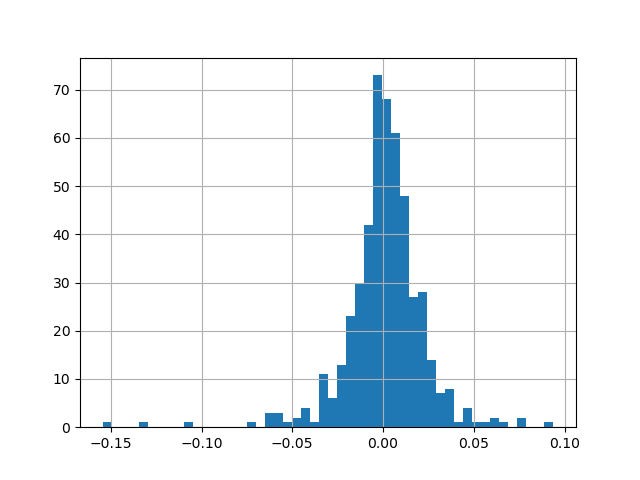

<AxesSubplot:>

In [120]:
fig, ax = plt.subplots()
log_return.hist(bins=50, ax=ax)

In [121]:
log_return.std()

0.02225860946974574

In [122]:
log_return.mean()

0.0009955934048357753

In [123]:
sharpe_ratio=log_return.mean()/log_return.std()

In [124]:
sharpe_ratio

0.04472846366207205

In [125]:
asr=sharpe_ratio*252**.5

In [126]:
asr

0.7100423482549922

In [127]:
weight=np.random.random(4)
weight /= weight.sum()
weight

array([0.22360828, 0.16397739, 0.2264826 , 0.38593173])

In [134]:
log_return2=np.sum(np.log(data/data.shift())*weight, axis=1)

In [135]:
sharpe_ratio2=log_return2.mean()/log_return2.std()

In [136]:
asr2=sharpe_ratio2*252**.5

In [137]:
asr2

0.6993229823826902